## Notebook Imports

In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

# Gather Data

In [2]:
boston_dataset = load_boston()

In [3]:
type(boston_dataset) #Object of type bunch

sklearn.utils.Bunch

In [4]:
boston_dataset

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [5]:
dir(boston_dataset) #Shows list of attributes

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [6]:
print(boston_dataset.DESCR) # Description of dataset

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Data points and features

In [7]:
boston_dataset.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [8]:
type(boston_dataset.data) #ndarray

numpy.ndarray

In [9]:
boston_dataset.data.shape #506 rows and 13 columns accessing manually

(506, 13)

In [10]:
# Attributes of dataset
# Refer to feature or INDEPENDENT VARIABLE or columns in data
# Used to predict the house price

boston_dataset.feature_names  #dir() fucntion

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [11]:
boston_dataset.target #actual prices of houses in thousands

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

## Data exploration with Pandas Dataframe

In [12]:
#Create pandas DataFrame
data = pd.DataFrame(data=boston_dataset.data , columns=boston_dataset.feature_names)

# Add column with the price(target)
data['PRICE'] = boston_dataset.target

In [13]:
# top part of data
data.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

In [14]:
data.tail() #bottom part of data

CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
501  0.06263  0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527  0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076  0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959  0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741  0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  
501     21.0  391.99   9.67   22.4  
502     21.0  396.90   9.08   20.6  
503     21.0  396.90   5.64   23.9  
504     21.0  393.45   6.48   22.0  
505     21.0  396.90   7.88   11.9

In [15]:
data.count() #shows number of rows for each column
#No of rows is referred to as number of INSTANCES

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

## Cleaning Data - Check for missing values

In [16]:
# isnull()  returns table for missing value
pd.isnull(data)

CRIM     ZN  INDUS   CHAS    NOX     RM    AGE    DIS    RAD    TAX  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
501  False  False  False  False  False  False  False  False  False  False   
502  False  False  False  False  False  False  False  False  False  False   
503  False  False  False  False  False  False  False  False  False  False   
504  False  False  False  False  False  False  False  False  False  False   
505  False  False  False  False  False  False  False  False  False  False   

     PTRATIO      B  LSTAT  PRICE  
0      False  False  False  False  
1      False  False  False  False  
2      False  False  False  False  
3      False  False  False  False  
4      False  False  False  False  
..       ...    ...    ...    ...  
501    False  False  False  False  
502    False  False  False  False  
503    False  False  False  False  
504    False  False  False  False  
505    False  False  False  False  

[506 rows x 14 columns]

In [17]:
# using pandas module
pd.isnull(data).any() #if there are any missing values in any of the columns

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [18]:
# using dataframe 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## Visualising Data - Histograms , distributions and Bar Chart

In [19]:
# HISTOGRAM is bar chart that shows frequency of particular value
# 13 independent variable - Measured Differently
# Histogram helps in analysing these data
# The house prices-how will its distribution look like ? 
# not a bell shape

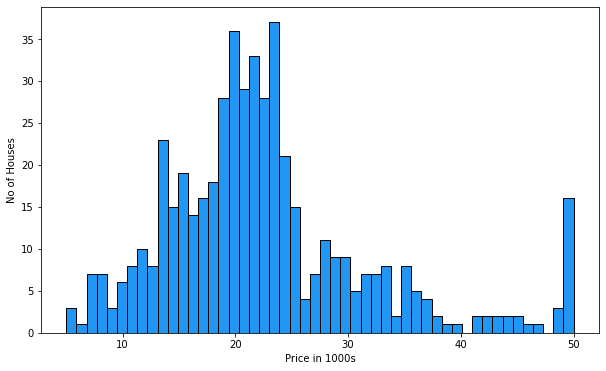

In [20]:
plt.figure(figsize=(10,6))
plt.hist(data['PRICE'], bins=50 , ec='black' , color='#2196F3') 
# bins = no. of bars(how granual should be our histogram) ec=edge color
#argument = what should be plotted on histogram - House Prices
plt.xlabel('Price in 1000s')
plt.ylabel('No of Houses')
plt.show()

C:\Users\abhis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


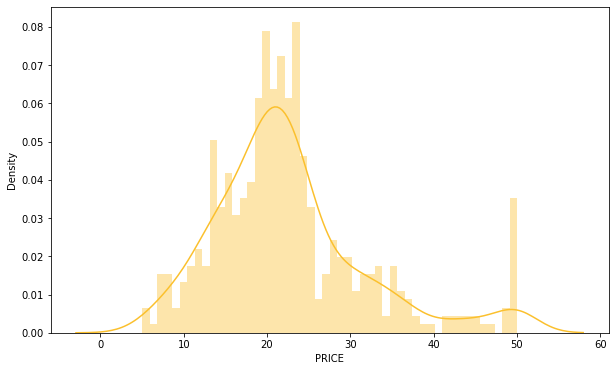

In [21]:
plt.figure(figsize=(10,6))
sns.distplot(data['PRICE'] , bins=50, hist=True, kde=True , color='#FBC02D')
plt.show()
# A histogram and estiamte of Probability Density Function (PDF)
# Estimates distribution of data
# hist attribute to show or hide histogram 
# kde attribute to show or hide PDF

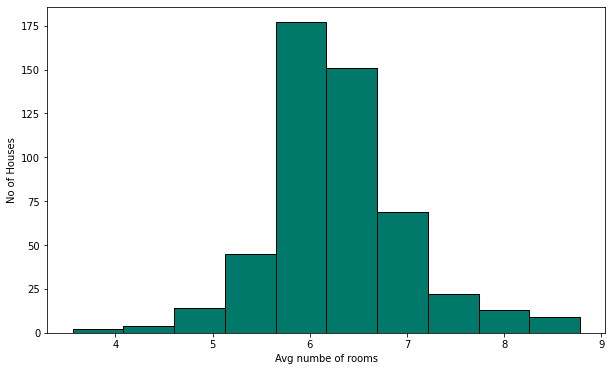

In [22]:
plt.figure(figsize=(10,6))
plt.hist(data['RM'], ec='black' , color='#00796B') 
plt.xlabel('Avg numbe of rooms')
plt.ylabel('No of Houses')
plt.show()

# highest bar is around 6 
# it means most properties in boston have 6 rooms

In [23]:
data['RM'].mean() # excat room average

6.284634387351787

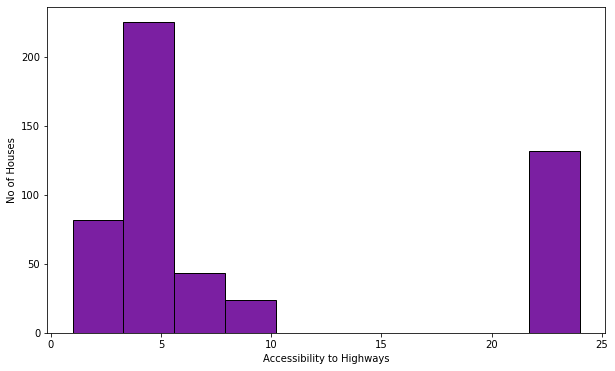

In [24]:
# Measure of accessibility to highway
# RAD
plt.figure(figsize=(10,6))
plt.hist(data['RAD'], ec='black' , color='#7b1fa2') 
plt.xlabel('Accessibility to Highways')
plt.ylabel('No of Houses')
plt.show()

In [25]:
data['RAD'].value_counts() # how many col have a particular value 
# 1 - low accessibility 
# 24 - high accessibilty
#RAD -index of accessibility

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
2.0      24
8.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

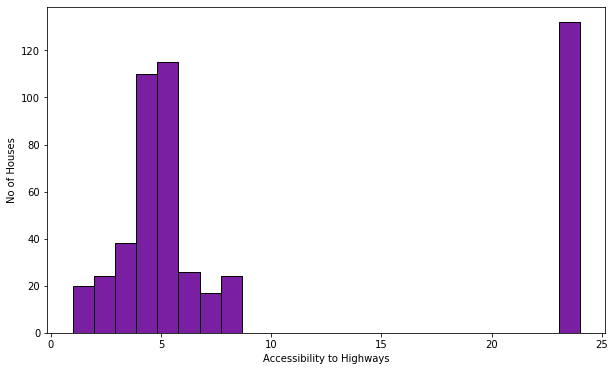

In [26]:
plt.figure(figsize=(10,6))
plt.hist(data['RAD'],bins=24, ec='black' , color='#7b1fa2') 
plt.xlabel('Accessibility to Highways')
plt.ylabel('No of Houses')
plt.show()

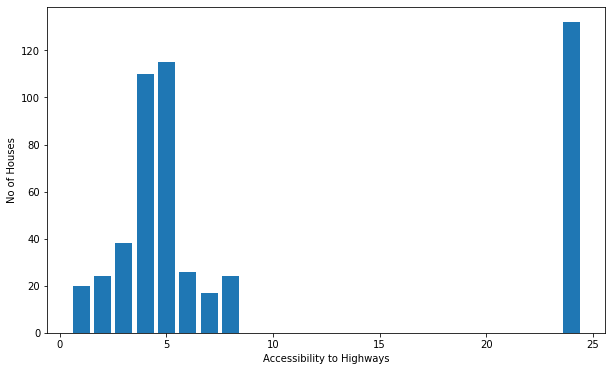

In [27]:
frequency = data['RAD'].value_counts()
#type(frequency)
#frequency.index
#frequency.axes[0] # retrieve row axes labels
plt.figure(figsize=(10,6))
plt.xlabel('Accessibility to Highways')
plt.ylabel('No of Houses')
plt.bar(frequency.index , height = frequency)
plt.show()

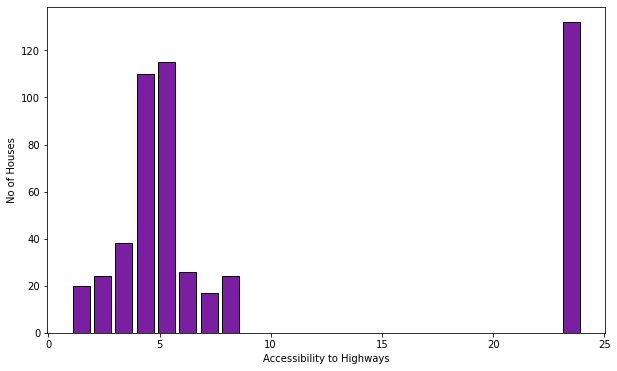

In [28]:
# histogram with space
plt.figure(figsize=(10,6))
plt.hist(data['RAD'],bins=24, ec='black' , color='#7b1fa2' , rwidth=0.8) 
plt.xlabel('Accessibility to Highways')
plt.ylabel('No of Houses')
plt.show()

#rwidth - either side of bar will have space of 0.1

In [29]:
data['CHAS'].value_counts() 
# 0 - not on river
# 1 - on the river

0.0    471
1.0     35
Name: CHAS, dtype: int64

## Descriptive Stats

In [30]:
data['PRICE'].min() #smallest house price

5.0

In [31]:
 data['PRICE'].max() #max house price

50.0

In [32]:
data.min() # min value in every single column

CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
PRICE        5.00000
dtype: float64

In [33]:
data.mean()

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
PRICE       22.532806
dtype: float64

In [34]:
data.median()

CRIM         0.25651
ZN           0.00000
INDUS        9.69000
CHAS         0.00000
NOX          0.53800
RM           6.20850
AGE         77.50000
DIS          3.20745
RAD          5.00000
TAX        330.00000
PTRATIO     19.05000
B          391.44000
LSTAT       11.36000
PRICE       21.20000
dtype: float64

In [35]:
data.describe() # all stats at same time

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT       PRICE  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

## Correlation 
## $$ \rho_{x,y} = corr(X,Y) $$
## $$ -1.0 \leq \rho _{XY} \leq +1.0 $$

In [36]:
# Corelation is degree with which things move together
# positive and negative correlation 
# perfect negative coreelation - line shape less band
# no coorelation - cloud of points with no clear pattern
# rho (x,y) = corr(X,Y)
# Strength and Direction of Correlation

In [37]:
data['PRICE'].corr(data['RM']) #PRICE vs RM correlation
# positive correlation
# larger rooms more expensive the property

0.695359947071539

In [38]:
data['PRICE'].corr(data['PTRATIO'])
# Negative correlation
# price and pupil teacher ratio
# if pt ratio goes up implies more pupil and less teacher than price goes down

-0.5077866855375615

In [39]:
data.corr() # all the corelations
# pearson correlation coefficients

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
PRICE   -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT     PRICE  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
PRICE    0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

In [40]:
# High correlation between features can be .... problematic
# predict bone density using : age , body fat % , weight
# body fat and weight are highly correlated we will have difficulty in telling apart individual effects
# it becomes difficllt to measure individual contributions tp bone density to either of two explanatory variables
# Multicollinearity ->  each of these do not provide unique and independent info to the regression
# unreliable and non sensical results

In [41]:
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

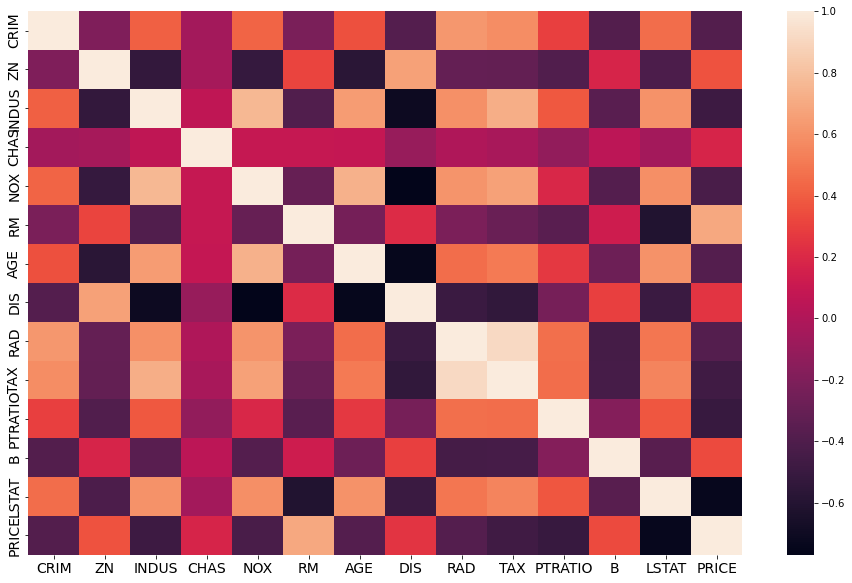

In [42]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr())
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

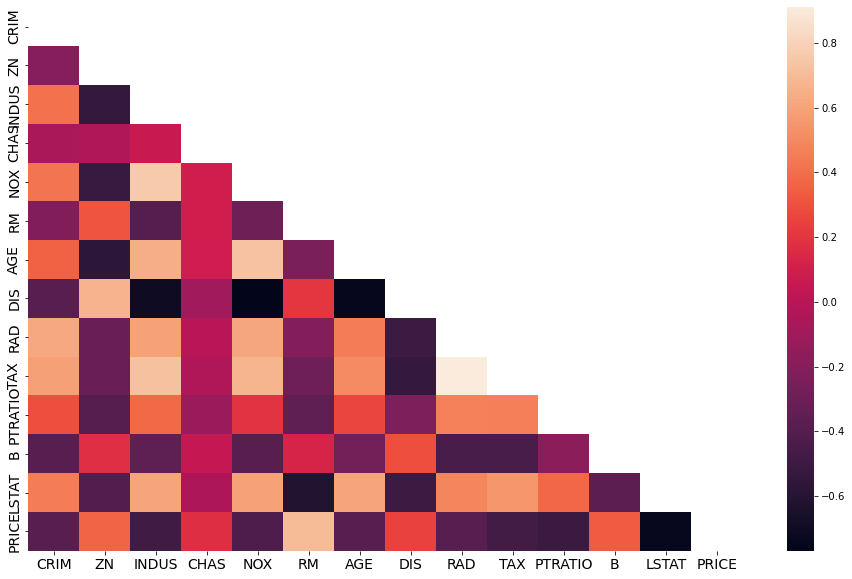

In [43]:
#Hidden half chart
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), mask=mask)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

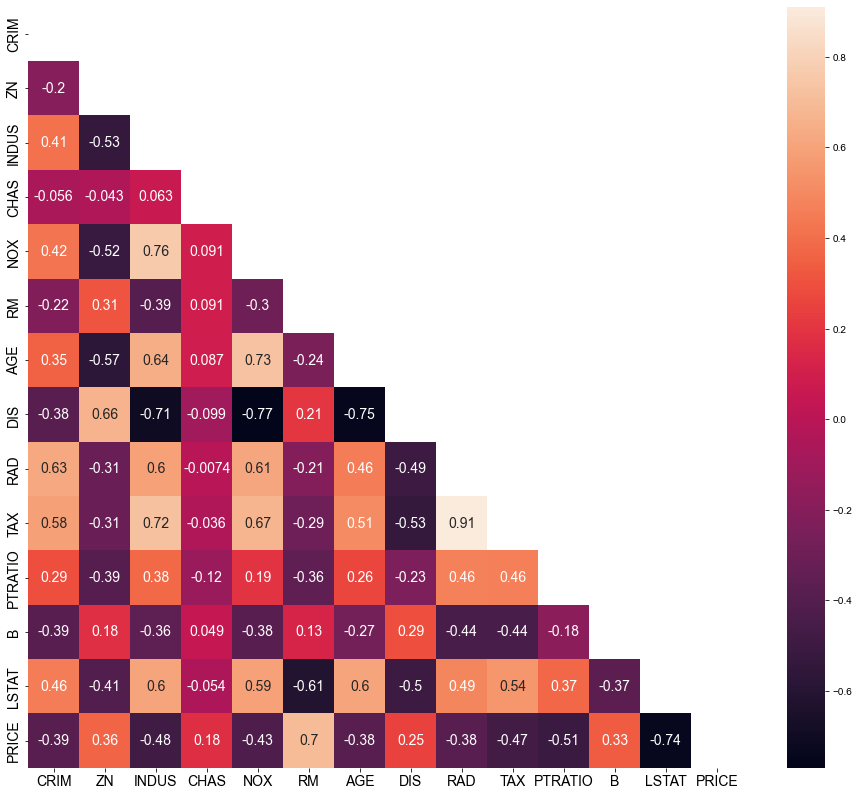

In [44]:
plt.figure(figsize=(16,14))
sns.heatmap(data.corr(), mask=mask , annot=True , annot_kws={"size":14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

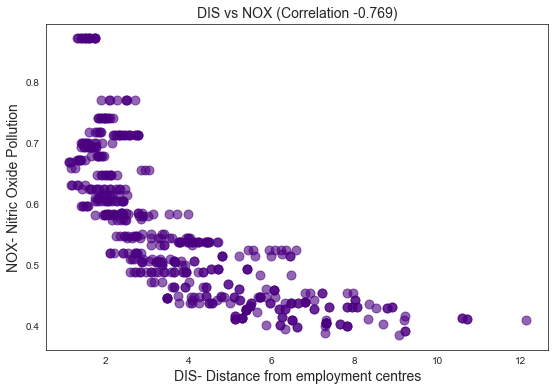

In [45]:
nox_dis_corr = round(data['NOX'].corr(data['DIS']), 3) #round off to 3 decimal places

plt.figure(figsize=(9,6))

plt.scatter(x=data['DIS'],y=data['NOX'], alpha=0.6, s=80, color='indigo')

plt.title(f'DIS vs NOX (Correlation {nox_dis_corr})', fontsize=14)
plt.xlabel('DIS- Distance from employment centres',fontsize=14)
plt.ylabel('NOX- Nitric Oxide Pollution',fontsize=14)

plt.show()
# as distance from employment centres increases pollution decreases

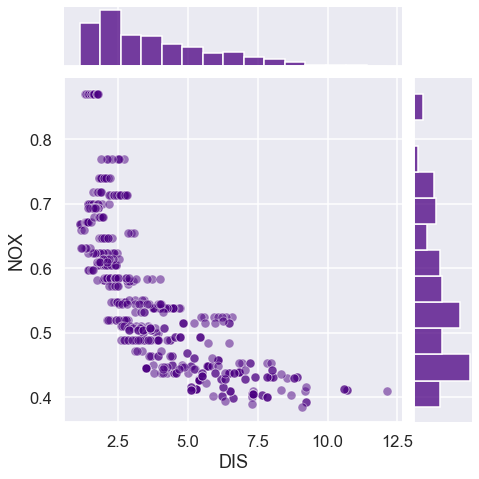

In [46]:
# reset the styling
sns.set()
sns.set_context('talk') #how charts gonna be used-notebook,talk,paper,poster
sns.set_style('darkgrid') #template style
# create our scatter plot from seaborn
sns.jointplot(x=data['DIS'], y=data['NOX'], height=7, color='indigo',joint_kws={'alpha':0.5}) 
plt.show()

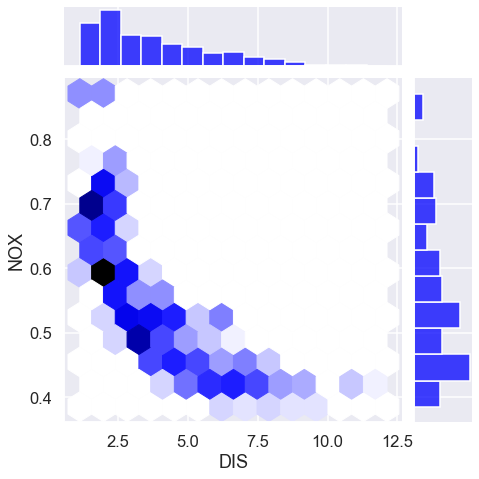

In [47]:
# reset the styling
sns.set()
sns.set_context('talk') #how charts gonna be used-notebook,talk,paper,poster
sns.set_style('darkgrid') #template style
# create our scatter plot from seaborn
sns.jointplot(x=data['DIS'], y=data['NOX'],
              height=7, color='blue', kind='hex')  #shades depending on how many datapoints are there in that region
plt.show()

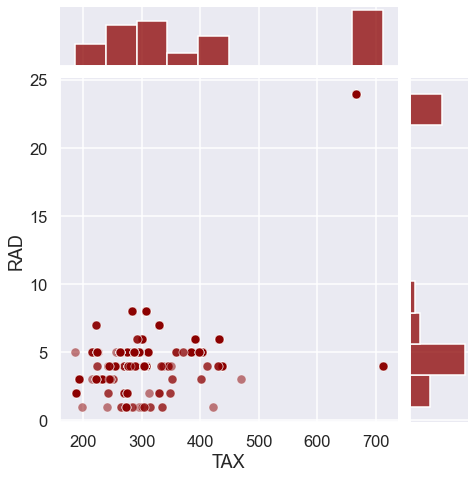

In [48]:
sns.set()
sns.set_context('talk') 
sns.set_style('darkgrid')
sns.jointplot(x=data['TAX'], y=data['RAD'], height=7, color='darkred',joint_kws={'alpha':0.5}) 
plt.show()

#though corelation is 0.91 but it does not look like a straight line
# it is because data is NOT CONTINUOUS
# Big outliers in top right corner

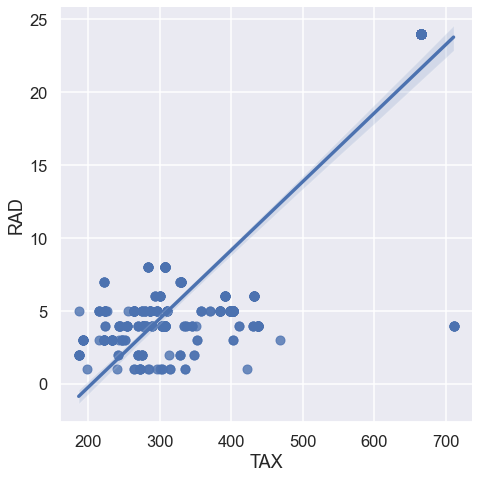

In [49]:
sns.lmplot(x='TAX',y='RAD', data=data, height=7) 
plt.show()
# data points on top right corner is affecting slope of our regression line significnantly
# not so useful model 

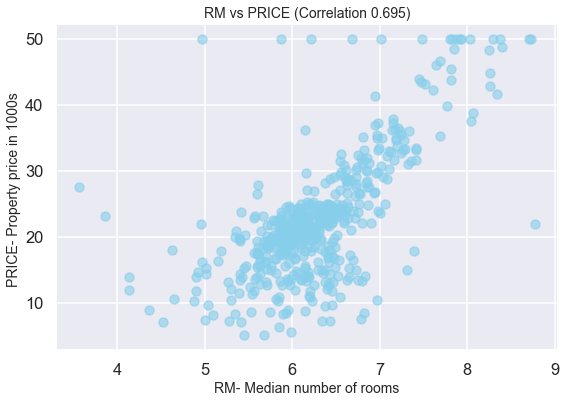

In [50]:
rm_tgt_corr = round(data['RM'].corr(data['PRICE']), 3) #round off to 3 decimal places

plt.figure(figsize=(9,6))

plt.scatter(x=data['RM'],y=data['PRICE'], alpha=0.6, s=80, color='skyblue')

plt.title(f'RM vs PRICE (Correlation {rm_tgt_corr})', fontsize=14)
plt.xlabel('RM- Median number of rooms',fontsize=14)
plt.ylabel('PRICE- Property price in 1000s ',fontsize=14)

plt.show()
# as distance from employment centres increases pollution decreases

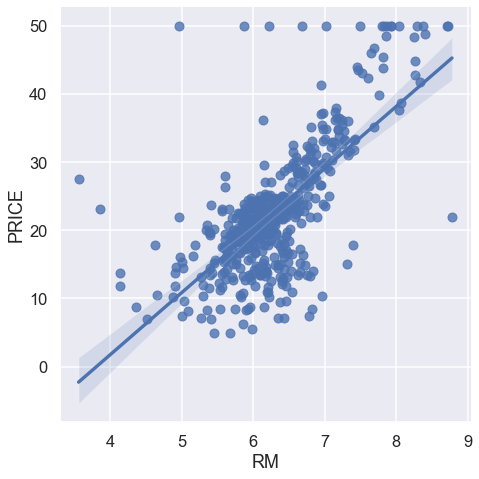

In [51]:
sns.lmplot(x='RM', y='PRICE', data = data, height=7)
plt.show()
# correlation of 0.7

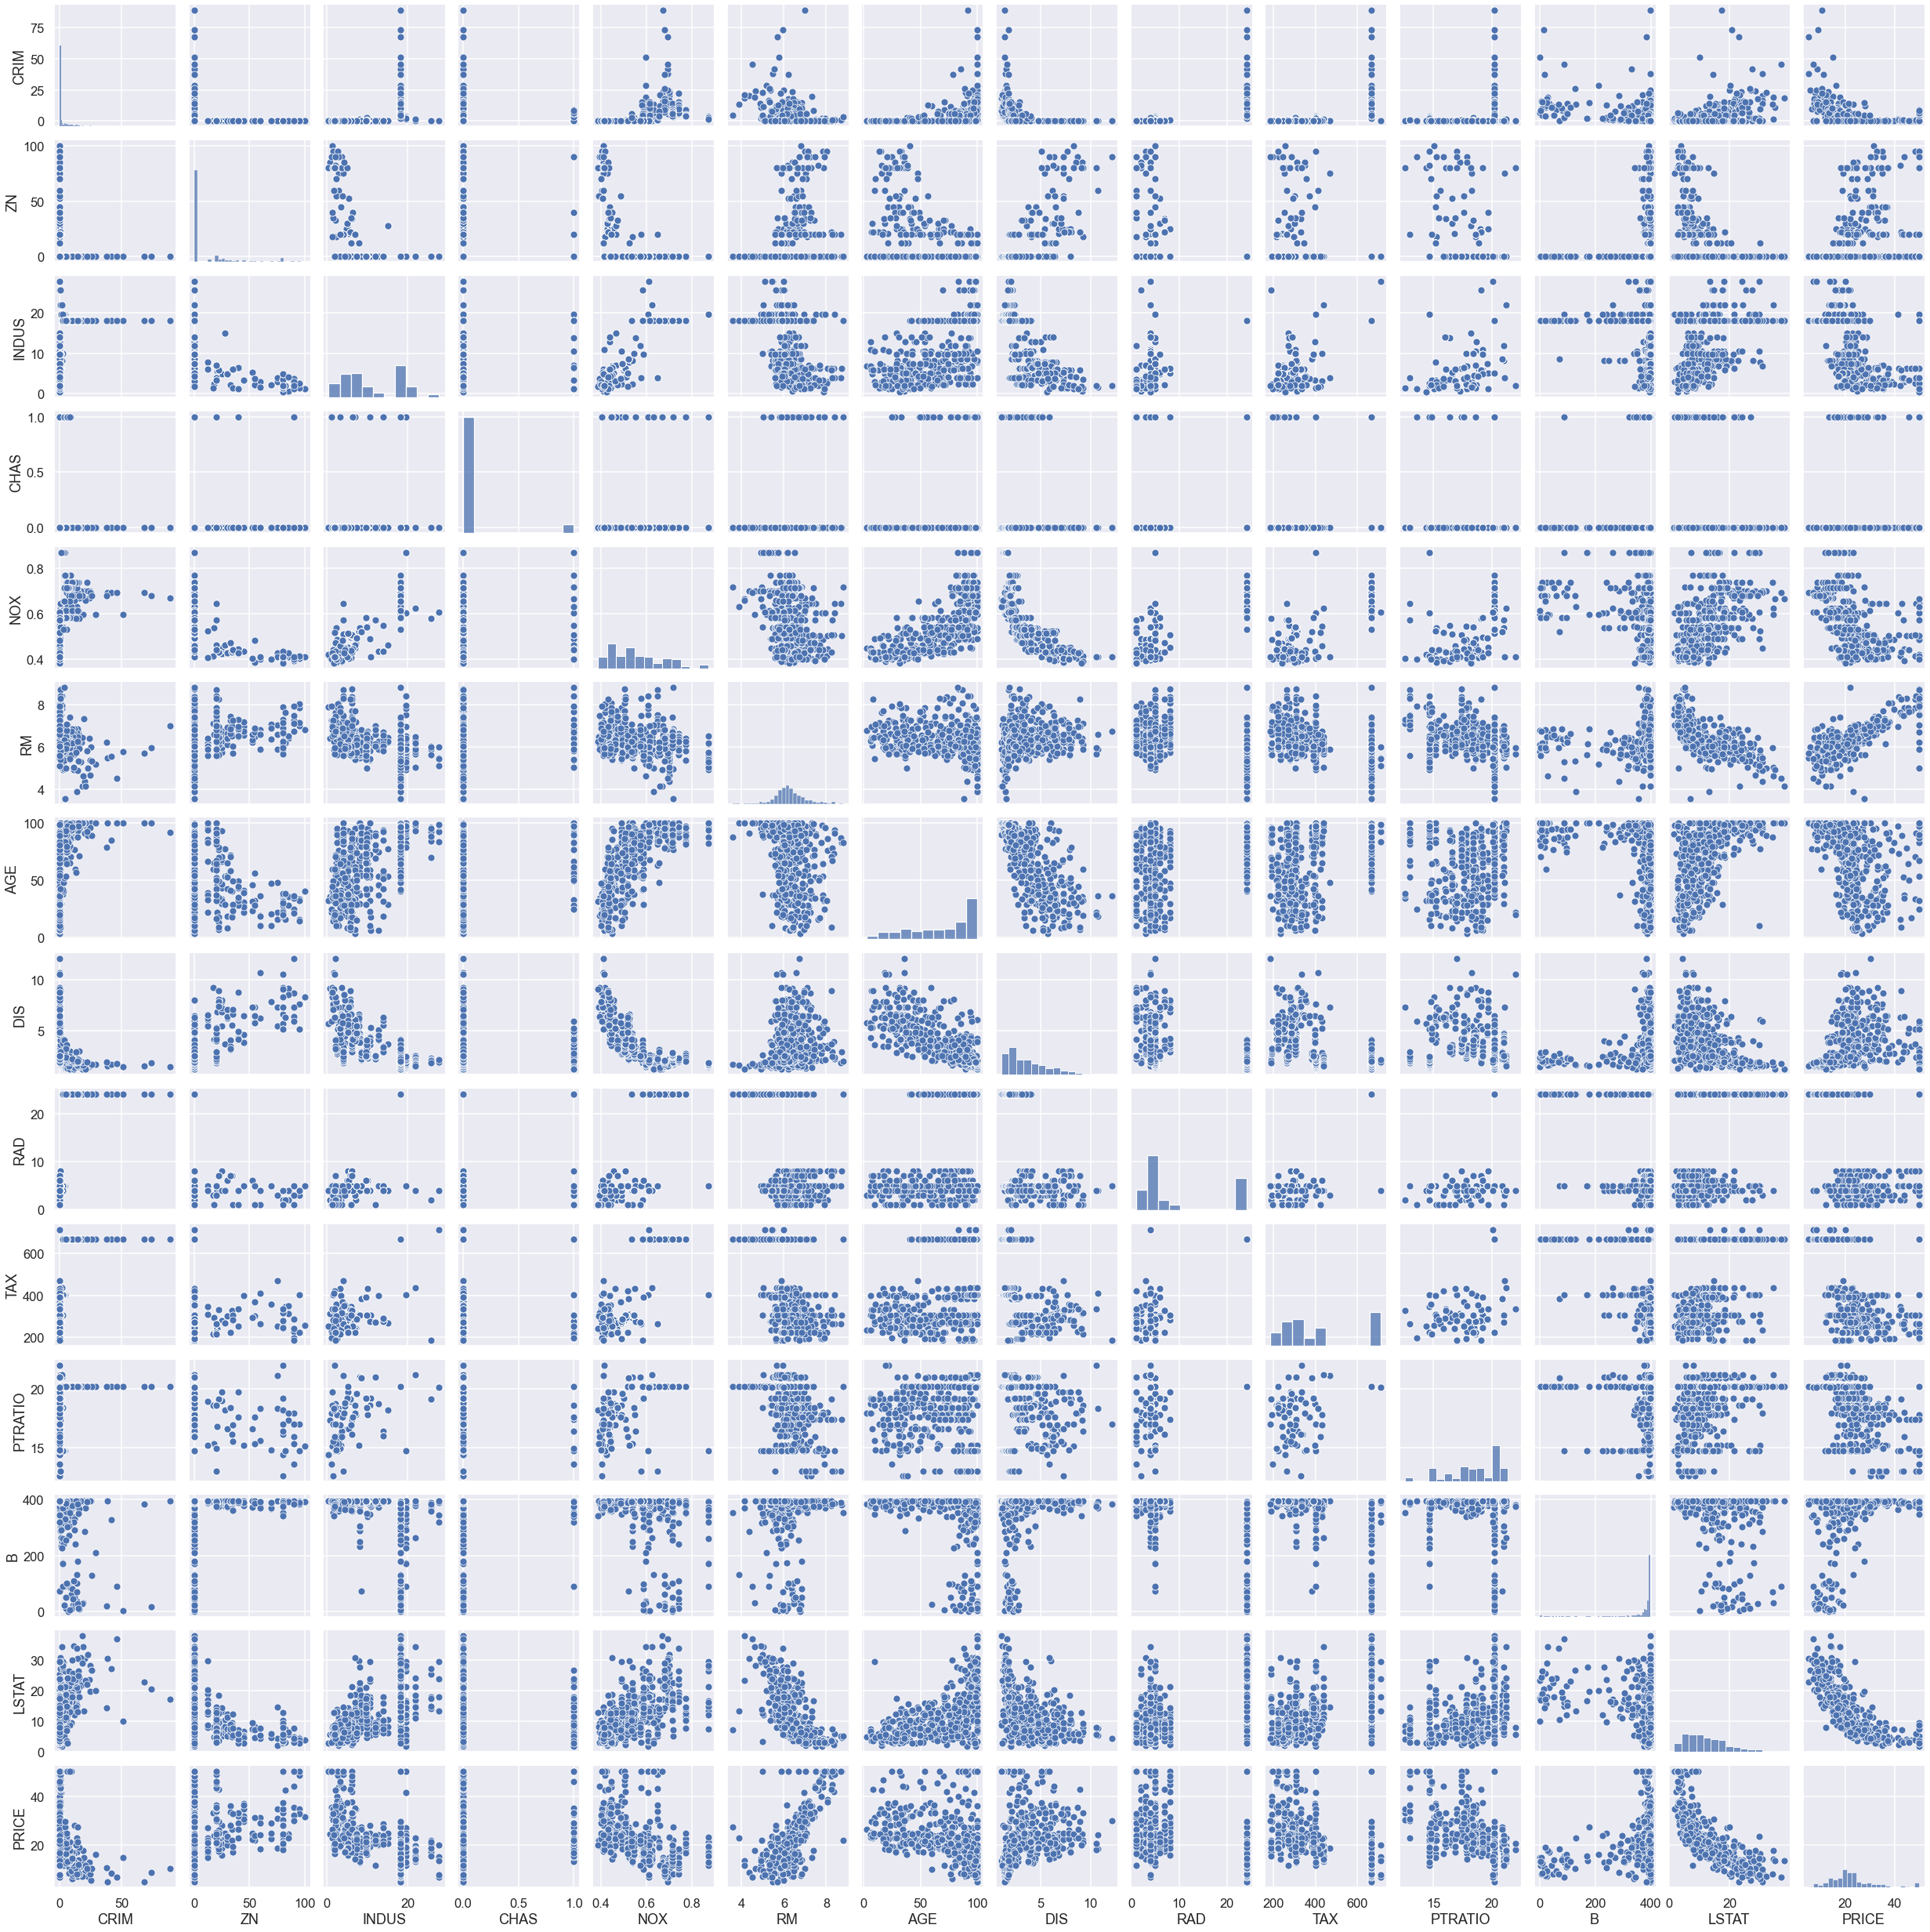

Wall time: 32.7 s


In [52]:
%%time

# graph all pairs at once
sns.pairplot(data)
plt.show()

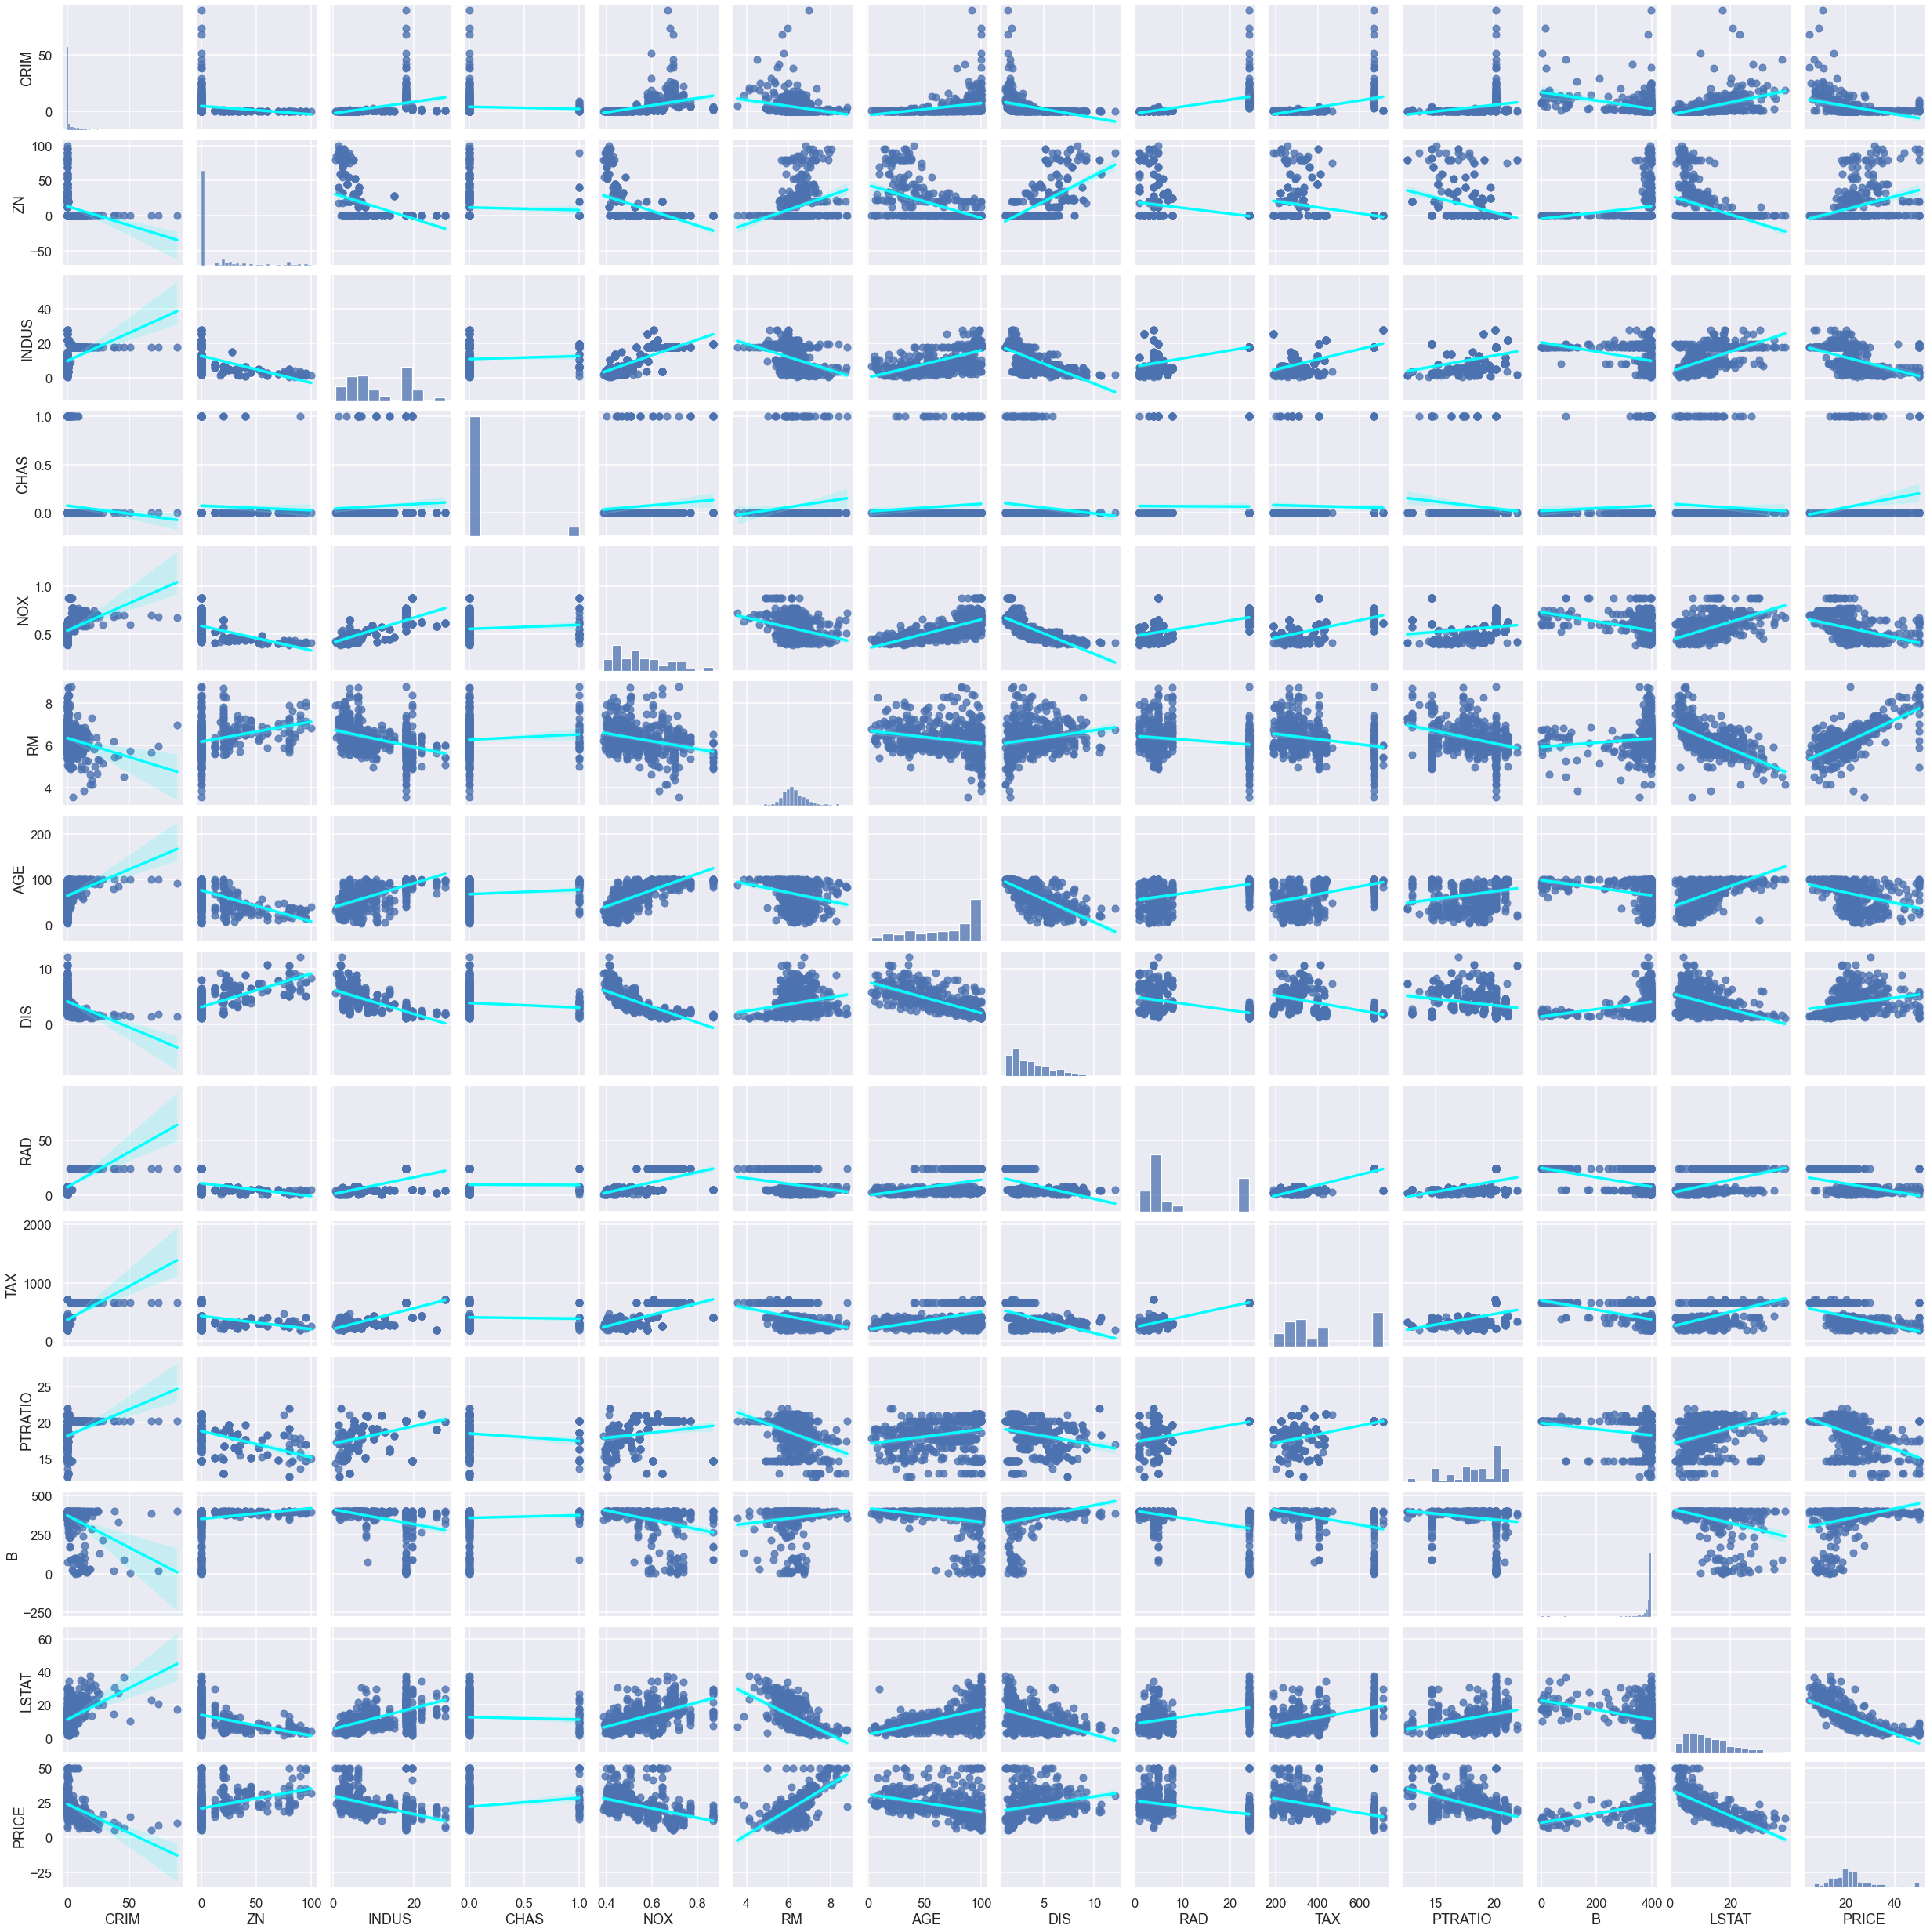

Wall time: 1min 7s


In [53]:
%%time
sns.pairplot(data,kind='reg', plot_kws={'line_kws':{'color':'cyan'}}) #dictionary inside dictionary
plt.show()

## Training and test dataset split

In [54]:
# Training and Testing DATASET
prices = data['PRICE']
features = data.drop('PRICE', axis=1)
# Entire data data frame and dropped one column
# returns new dataframe without price col

X_train,X_test, y_train, y_test = train_test_split(features, prices,
                                                   test_size=0.2, random_state=10)  
#test data set will be 20 percent of total  (80 20 split)
# random state - for shuffling (starting point - reshuffler)
# Why shuffle the data? 
# To add Randomness - there cant be a clear pattern


# % of training set
len(X_train)/len(features)


0.7984189723320159

In [55]:
# % of test data set
len(X_test)/len(features)

0.2015810276679842

## Multivariable Regression

In [56]:
regr = LinearRegression()
regr.fit(X_train,y_train)   #train our model

print('Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns , columns=['coef'])

Intercept 36.53305138282439


coef
CRIM     -0.128181
ZN        0.063198
INDUS    -0.007576
CHAS      1.974515
NOX     -16.271989
RM        3.108456
AGE       0.016292
DIS      -1.483014
RAD       0.303988
TAX      -0.012082
PTRATIO  -0.820306
B         0.011419
LSTAT    -0.581626

In [57]:
# Rsquare
print('Training data Rsquare' , regr.score(X_train,y_train))
print('Test data Rsquare' , regr.score(X_test,y_test))

# Why is r square lower for test data ?


Training data Rsquare 0.750121534530608
Test data Rsquare 0.6709339839115628


## Data Transformation

In [58]:
data['PRICE'].skew()
# skew of normal distribution is ZERO
# Bell shaped curve

1.1080984082549072

In [59]:
# using log transformation
# small change for small value
# large change for large value
# good fit

y_log = np.log(data['PRICE'])
y_log.head()
y_log.tail()

501    3.109061
502    3.025291
503    3.173878
504    3.091042
505    2.476538
Name: PRICE, dtype: float64

In [60]:
y_log.skew()
# lot closer to zero than 1.1

-0.33032129530987864

C:\Users\abhis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


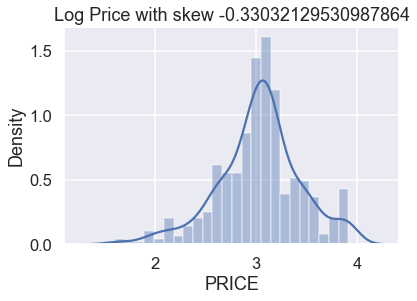

In [61]:
sns.distplot(y_log)
plt.title(f'Log Price with skew {y_log.skew()}')
plt.show()
# lot more symmetrical

C:\Users\abhis\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


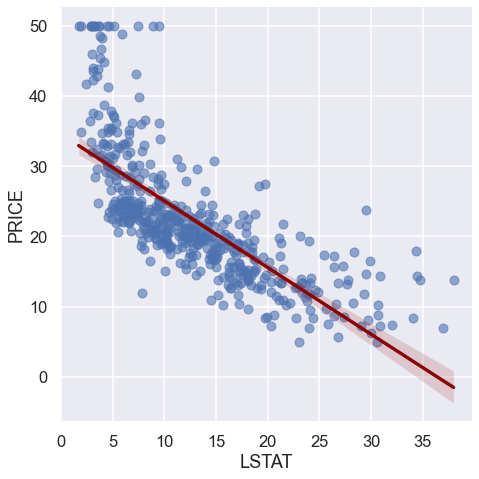

In [62]:
sns.lmplot(x='LSTAT' , y='PRICE' , data=data, size=7 ,
           scatter_kws={'alpha':0.6}, line_kws={'color':'darkred'})
plt.show()

C:\Users\abhis\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


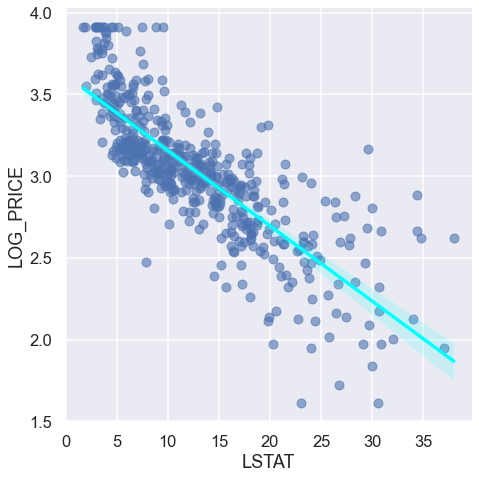

In [63]:
# Plotting log price
transformed_data = features
transformed_data['LOG_PRICE'] = y_log

sns.lmplot(x='LSTAT' , y='LOG_PRICE' , data=transformed_data, size=7 ,
           scatter_kws={'alpha':0.6}, line_kws={'color':'cyan'})
plt.show()

## Regression using log prices

In [64]:
# Training and Testing DATASET
prices = np.log(data['PRICE'])
features = data.drop('PRICE', axis=1)


X_train,X_test, y_train, y_test = train_test_split(features, prices,
                                                   test_size=0.2, random_state=10)  

regr = LinearRegression()
regr.fit(X_train,y_train)   #train our model

print('Training data Rsquare' , regr.score(X_train,y_train))
print('Test data Rsquare' , regr.score(X_test,y_test))

print('Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns , columns=['coef'])

# Higher r square
# Better fit

Training data Rsquare 0.7930234826697583
Test data Rsquare 0.7446922306260724
Intercept 4.05994387177519


coef
CRIM    -0.010672
ZN       0.001579
INDUS    0.002030
CHAS     0.080331
NOX     -0.704068
RM       0.073404
AGE      0.000763
DIS     -0.047633
RAD      0.014565
TAX     -0.000645
PTRATIO -0.034795
B        0.000516
LSTAT   -0.031390

In [65]:
# Charles river property preminum
np.e **0.080331
# new model - people will pay 1084 dollar more to live near the model

1.0836456950439142

## p values and Evaluating coefficients

In [66]:
# p value 
# analyse the signifance of theta
# if p>0.05 -> not significant 
# if p<0.05 -> significant


In [67]:
X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train , X_incl_const) # ordinary least square -> we provide target values and features
results = model.fit()

#results.params
#results.pvalues

pd.DataFrame({'coef':results.params,'pvalues':round(results.pvalues, 3)})
# age and indus feature fail p value significance test


C:\Users\abhis\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


coef  pvalues
const    4.059944    0.000
CRIM    -0.010672    0.000
ZN       0.001579    0.009
INDUS    0.002030    0.445
CHAS     0.080331    0.038
NOX     -0.704068    0.000
RM       0.073404    0.000
AGE      0.000763    0.209
DIS     -0.047633    0.000
RAD      0.014565    0.000
TAX     -0.000645    0.000
PTRATIO -0.034795    0.000
B        0.000516    0.000
LSTAT   -0.031390    0.000

## Testing for Multicollinearity

$$ TAX = \alpha_0 + \alpha_1 RM + \alpha_2 NOX + .... + \alpha_{12} LSTAT $$

$$ VIF_{TAX} = \frac{1} {(1-R_{TAX} ^ 2)} $$


In [68]:
# multicollinearity -> 
# when two or more predictor variables in a regression are highly related to one another
# they do not provide unique and independent info to the model
# Loss of reliablity in estimates of effects for the individual features
# High  variability in theta estimates for small changes in models
# strange findings


In [69]:
# Variance inflation factor (VIF)
# spit out a number that quantifies severity of multicollinarity
# VIF > Threshold ??


In [70]:
variance_inflation_factor(exog=X_incl_const.values, exog_idx=1)
# type(X_incl_const) # DataFrame and not ndarray which we need to pass in VIF

1.7145250443932485

In [71]:
# len(X_incl_const.columns)
X_incl_const.shape[1] # no of columns

14

In [72]:
for i in range(X_incl_const.shape[1]):
    print(variance_inflation_factor(exog=X_incl_const.values, exog_idx=i))

597.5487126763895
1.7145250443932485
2.3328224265597584
3.943448822674636
1.0788133385000578
4.410320817897635
1.8404053075678568
3.3267660823099408
4.222923410477865
7.314299817005058
8.508856493040817
1.839911632651406
1.3386713255364715
2.812544292793034


In [73]:
vif = []  #empty list
for i in range(X_incl_const.shape[1]):
    vif.append(variance_inflation_factor(exog=X_incl_const.values,
                                         exog_idx=i))
print(vif)

[597.5487126763895, 1.7145250443932485, 2.3328224265597584, 3.943448822674636, 1.0788133385000578, 4.410320817897635, 1.8404053075678568, 3.3267660823099408, 4.222923410477865, 7.314299817005058, 8.508856493040817, 1.839911632651406, 1.3386713255364715, 2.812544292793034]


In [74]:
vif = [variance_inflation_factor(exog=X_incl_const.values,
                                 exog_idx=i) for i in range(X_incl_const.shape[1])]
pd.DataFrame({'coef_name':X_incl_const.columns,
             'vif': np.around(vif, 2)})

coef_name     vif
0      const  597.55
1       CRIM    1.71
2         ZN    2.33
3      INDUS    3.94
4       CHAS    1.08
5        NOX    4.41
6         RM    1.84
7        AGE    3.33
8        DIS    4.22
9        RAD    7.31
10       TAX    8.51
11   PTRATIO    1.84
12         B    1.34
13     LSTAT    2.81

In [75]:
# Threshold = 10
# all numbers are below 10 
# we dont need to worry abt multicollinearity

## Simplifying our Model & Baysian Info Criteria

In [76]:
# Remove some of the features
# not highly correlated with property prices
# Baysian Info Criteria (bic)
# lower BIC number is better
# pick bw two or more models

In [77]:
# orignal model with log prices and all features

X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train , X_incl_const) 
results = model.fit()


org_coef = pd.DataFrame({'coef':results.params,'pvalues':round(results.pvalues, 3)})

print('BIC is: ',results.bic)
print('Rsqaured is: ',results.rsquared)

BIC is:  -139.74997769478875
Rsqaured is:  0.7930234826697582


C:\Users\abhis\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [78]:
# Here reduced model 
#1 excluding INDUS
X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['INDUS'] ,axis=1)


model = sm.OLS(y_train , X_incl_const) 
results = model.fit()


coef_minus_indus = pd.DataFrame({'coef':results.params,'pvalues':round(results.pvalues, 3)})

print('BIC is: ',results.bic)
print('Rsqaured is: ',results.rsquared)

# more negative 
# improvement 
# lower number than before
# rsquared remains the same 
# even after removing one feature it hasnt impacted our fit

BIC is:  -145.14508855591163
Rsqaured is:  0.7927126289415163


C:\Users\abhis\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [79]:
# Here reduced mdel 
#2 excluding INDUS and AGE
X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['INDUS','AGE'] ,axis=1)


model = sm.OLS(y_train , X_incl_const) 
results = model.fit()


reduced_coef = pd.DataFrame({'coef':results.params,'pvalues':round(results.pvalues, 3)})

print('BIC is: ',results.bic)
print('Rsqaured is: ',results.rsquared)

# further improvement
# beneficial thing

BIC is:  -149.49934294224656
Rsqaured is:  0.7918657661852815


C:\Users\abhis\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [80]:
frames  = [org_coef,coef_minus_indus,reduced_coef]
pd.concat(frames, axis=1)

coef  pvalues      coef  pvalues      coef  pvalues
const    4.059944    0.000  4.056231    0.000  4.035922    0.000
CRIM    -0.010672    0.000 -0.010721    0.000 -0.010702    0.000
ZN       0.001579    0.009  0.001551    0.010  0.001461    0.014
INDUS    0.002030    0.445       NaN      NaN       NaN      NaN
CHAS     0.080331    0.038  0.082795    0.032  0.086449    0.025
NOX     -0.704068    0.000 -0.673365    0.000 -0.616448    0.000
RM       0.073404    0.000  0.071739    0.000  0.076133    0.000
AGE      0.000763    0.209  0.000766    0.207       NaN      NaN
DIS     -0.047633    0.000 -0.049394    0.000 -0.052692    0.000
RAD      0.014565    0.000  0.014014    0.000  0.013743    0.000
TAX     -0.000645    0.000 -0.000596    0.000 -0.000590    0.000
PTRATIO -0.034795    0.000 -0.034126    0.000 -0.033481    0.000
B        0.000516    0.000  0.000511    0.000  0.000518    0.000
LSTAT   -0.031390    0.000 -0.031262    0.000 -0.030271    0.000

## Residual and Residual Plot

C:\Users\abhis\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


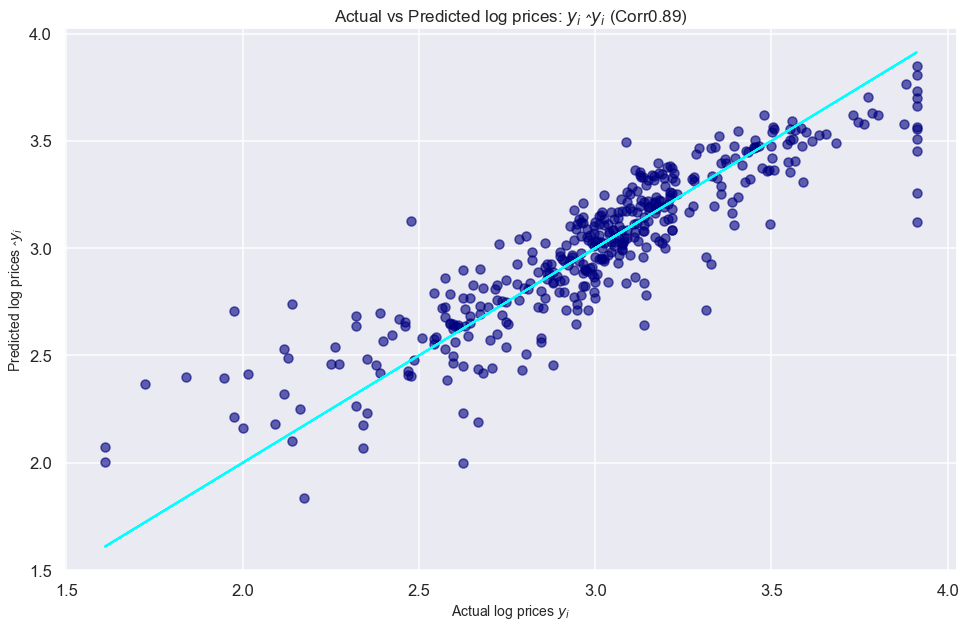

In [81]:
#modified model: transformed using log prices and simplified by dropping 2 features
prices = np.log(data['PRICE'])
features = data.drop(['PRICE','INDUS','AGE'], axis=1)


X_train,X_test, y_train, y_test = train_test_split(features, prices,
                                                   test_size=0.2, random_state=10)  

# Using stats-model
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

# Residuals
# residuals = y_train - results.fittedvalues
#results.resid


# Graph of actual vs predicted prices
corr = round(y_train.corr(results.fittedvalues),2)

plt.figure(figsize=(16,10))
plt.scatter(x=y_train , y=results.fittedvalues , color='navy' , alpha=0.6)
plt.plot(y_train,y_train, color='cyan') #actual line


plt.xlabel('Actual log prices $y_i$',fontsize=14)
plt.ylabel('Predicted log prices $ \hat y_i $', fontsize=14)
plt.title(f'Actual vs Predicted log prices: $y_i$ $\hat y_i$ (Corr{corr})', fontsize=17)

plt.show()

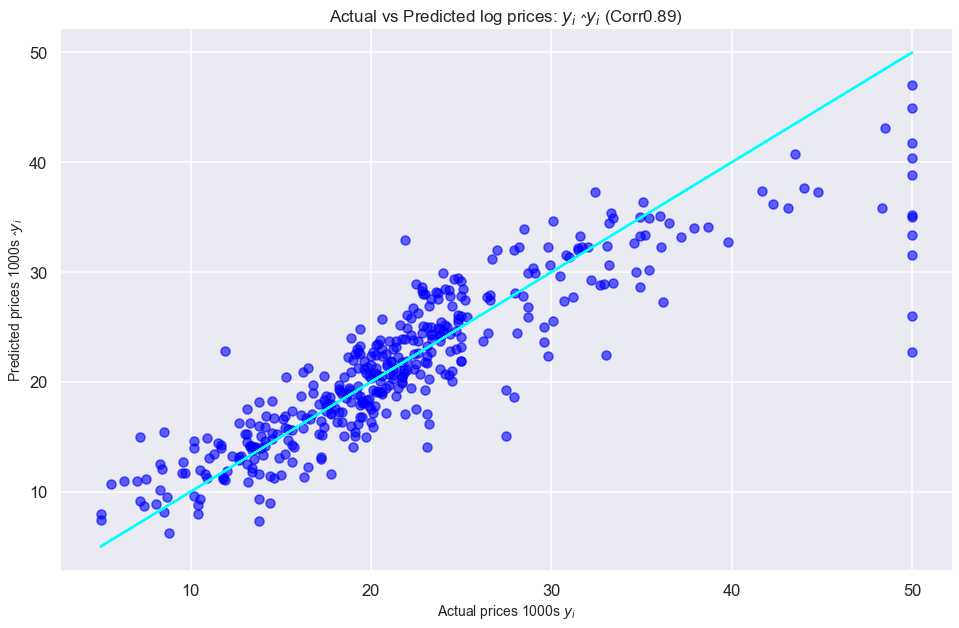

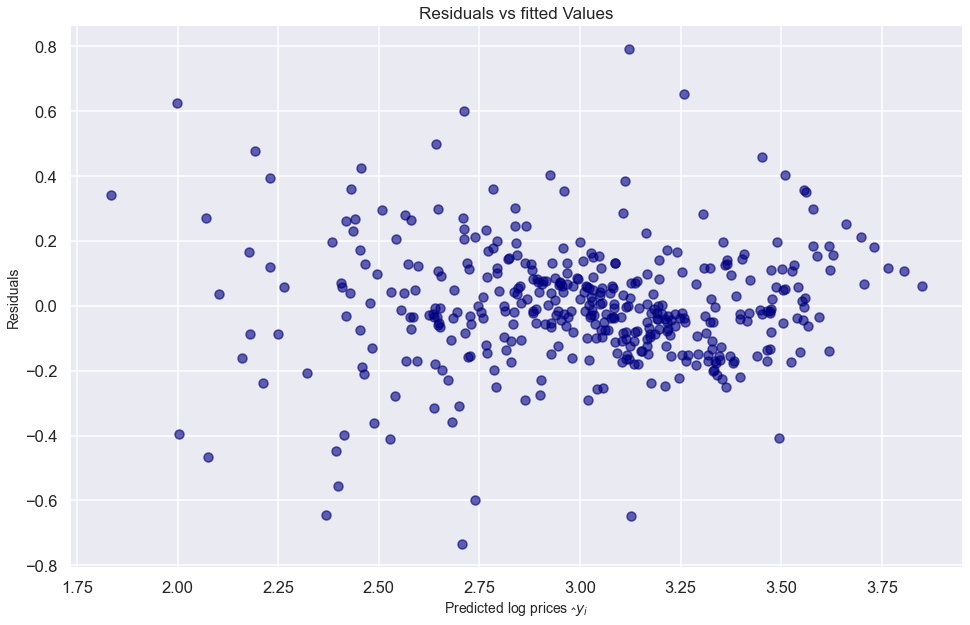

In [82]:
plt.figure(figsize=(16,10))
plt.scatter(x=np.e**y_train , y=np.e**results.fittedvalues , color='blue' , alpha=0.6)
plt.plot(np.e**y_train,np.e**y_train, color='cyan') #actual line


plt.xlabel('Actual prices 1000s $y_i$',fontsize=14)
plt.ylabel('Predicted prices 1000s $ \hat y_i $', fontsize=14)
plt.title(f'Actual vs Predicted log prices: $y_i$ $\hat y_i$ (Corr{corr})', fontsize=17)

plt.show()

#Residuals vs Predicted values
plt.figure(figsize=(16,10))
plt.scatter(x=results.fittedvalues , y=results.resid , color='navy' , alpha=0.6)


plt.xlabel('Predicted log prices $\hat y_i$',fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title(f'Residuals vs fitted Values', fontsize=17)

plt.show()

#Mean squared error & rsqaured
reduced_log_mse = round(results.mse_resid,3)
reduced_log_rsquared = round(results.rsquared,3)

C:\Users\abhis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


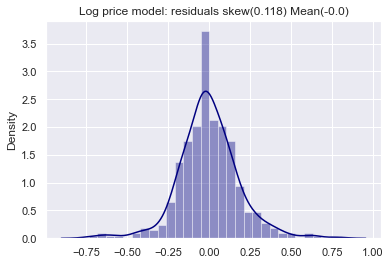

In [83]:
# Distribution of Residuals (log prices) - checking for normality
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(),3)

sns.set()
sns.distplot(results.resid, color='navy')
plt.title(f'Log price model: residuals skew({resid_skew}) Mean({resid_mean})')
plt.show()

In [84]:
# Using the orignal prices with  all features

C:\Users\abhis\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


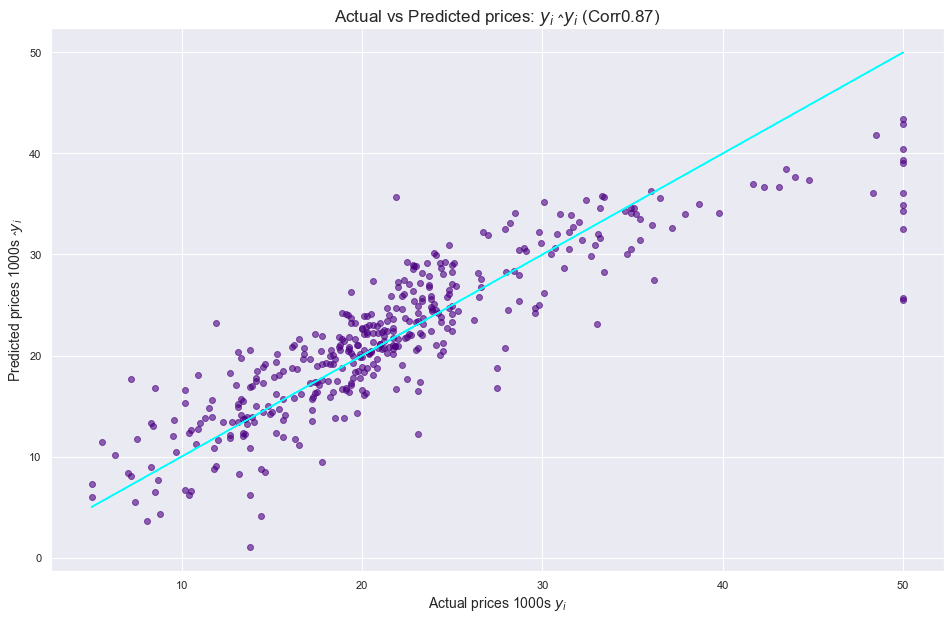

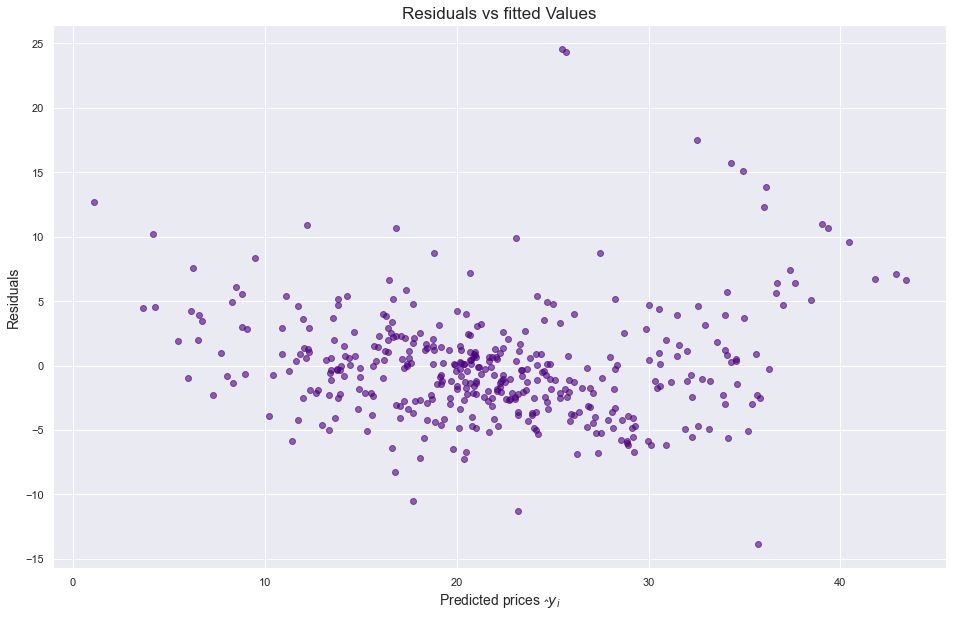

C:\Users\abhis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


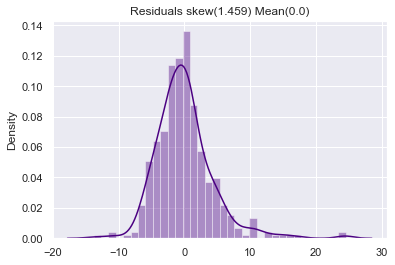

In [85]:
# Orignal model: normal prices and all featues
prices = data['PRICE']
features = data.drop(['PRICE'], axis=1)


X_train,X_test, y_train, y_test = train_test_split(features, prices,
                                                   test_size=0.2, random_state=10)  

# Using stats model
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()



# Graph of actual vs predicted prices
corr = round(y_train.corr(results.fittedvalues),2)

plt.figure(figsize=(16,10))
plt.scatter(x=y_train , y=results.fittedvalues , color='indigo' , alpha=0.6)
plt.plot(y_train,y_train, color='cyan') #actual line


plt.xlabel('Actual prices 1000s $y_i$',fontsize=14)
plt.ylabel('Predicted prices 1000s $ \hat y_i $', fontsize=14)
plt.title(f'Actual vs Predicted prices: $y_i$ $\hat y_i$ (Corr{corr})', fontsize=17)

plt.show()

#Residual vs Predicted
plt.figure(figsize=(16,10))
plt.scatter(x=results.fittedvalues , y=results.resid , color='indigo' , alpha=0.6)


plt.xlabel('Predicted prices $\hat y_i$',fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title(f'Residuals vs fitted Values', fontsize=17)

plt.show()

# Residual Distribution Chart
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(),3)

sns.set()
sns.distplot(results.resid, color='indigo')
plt.title(f'Residuals skew({resid_skew}) Mean({resid_mean})')
plt.show()


#Mean squared error & rsqaured
full_normal_mse = round(results.mse_resid,3)
full_normal_rsquared = round(results.rsquared,3)

C:\Users\abhis\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


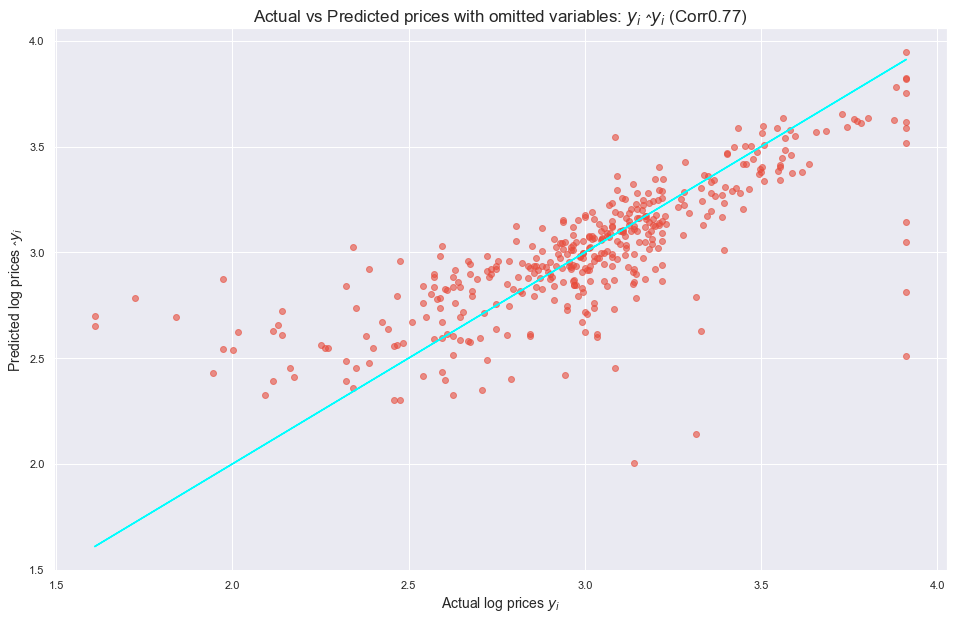

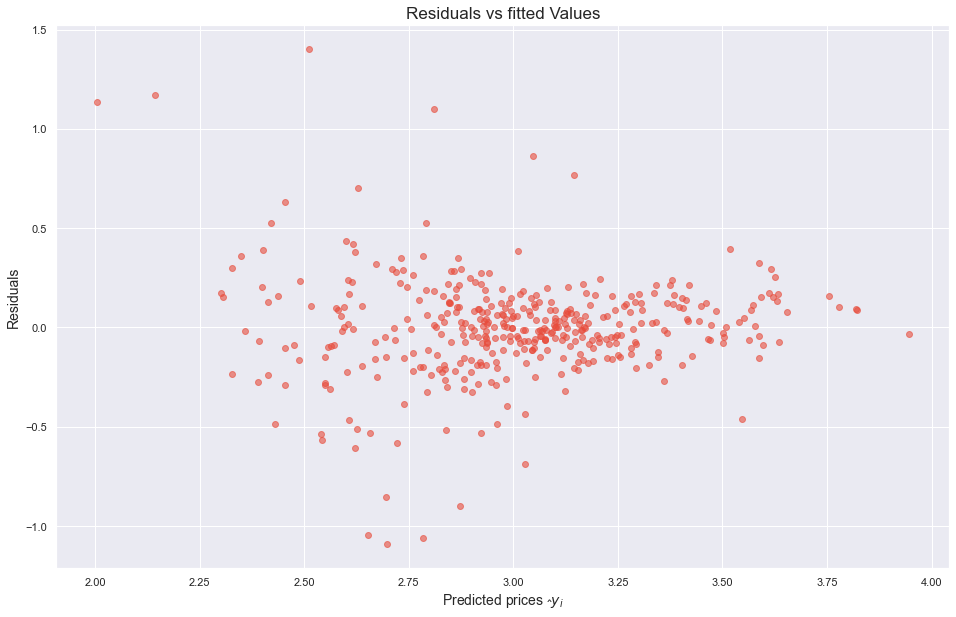

In [86]:
# Model omitting key features using log prices 
prices = np.log(data['PRICE'])
features = data.drop(['PRICE' , 'INDUS', 'AGE','LSTAT','NOX', 'CRIM'], axis=1)


X_train,X_test, y_train, y_test = train_test_split(features, prices,
                                                   test_size=0.2, random_state=10)  

# Using stats model
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()



# Graph of actual vs predicted prices
corr = round(y_train.corr(results.fittedvalues),2)

plt.figure(figsize=(16,10))
plt.scatter(x=y_train , y=results.fittedvalues , color='#e74c3c' , alpha=0.6)
plt.plot(y_train,y_train, color='cyan') #actual line


plt.xlabel('Actual log prices $y_i$',fontsize=14)
plt.ylabel('Predicted log prices $ \hat y_i $', fontsize=14)
plt.title(f'Actual vs Predicted prices with omitted variables: $y_i$ $\hat y_i$ (Corr{corr})', fontsize=17)

plt.show()

#Residual vs Predicted
plt.figure(figsize=(16,10))
plt.scatter(x=results.fittedvalues , y=results.resid , color='#e74c3c' , alpha=0.6)


plt.xlabel('Predicted prices $\hat y_i$',fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title(f'Residuals vs fitted Values', fontsize=17)

plt.show()


#Mean squared error & rsqaured
omitted_var_mse = round(results.mse_resid,3)
omitted_var_rsquared = round(results.rsquared,3)

## Making Predictions

In [87]:
pd.DataFrame({'R-squared':[reduced_log_rsquared, full_normal_rsquared,omitted_var_rsquared],
             'MSE':[reduced_log_mse,full_normal_mse,omitted_var_mse],
             'RMSE':np.sqrt([reduced_log_mse,full_normal_mse,omitted_var_mse])},
            index=['Reduced log model','Full normal price Model','Omitted Var Model'])

R-squared     MSE      RMSE
Reduced log model            0.792   0.035  0.187083
Full normal price Model      0.750  19.921  4.463295
Omitted Var Model            0.593   0.068  0.260768

In [92]:
print('1 Sd in log prices is: ', np.sqrt(reduced_log_mse))

1 Sd in log prices is:  0.18708286933869708


In [93]:
print('2 Sd in log prices is: ', 2*np.sqrt(reduced_log_mse))

2 Sd in log prices is:  0.37416573867739417


In [102]:
## Suppose the estimated price is $30000
upper_bound = np.log(30) + 2*np.sqrt(reduced_log_mse)
print("The upper bound for 95% prediction interval is:" , upper_bound)
print("The upper bound in normal prices is:" , np.e**upper_bound*1000)

The upper bound for 95% prediction interval is: 3.7753631203395495
The upper bound in normal prices is: 43613.34233239937


In [101]:
lower_bound = np.log(30) - 2*np.sqrt(reduced_log_mse)
print("The lower bound for 95% prediction interval is:" , lower_bound)
print("The lower bound in normal prices is:" , np.e**lower_bound*1000)

The lower bound for 95% prediction interval is: 3.0270316429847615
The lower bound in normal prices is: 20635.886906824155
